<section>
    <div><img src="../../images/Zahra-Amini.jpg"></div>
    <div style="display: flex">
        <div style="width:50%;background:#62060b">
            <div style="margin:auto;width:15rem">
                <img src="../../images/filoger.png" style="width:9rem; padding: 0.5rem 0;display:inline-block; vertical-align: middle">
                <p style="display:inline-block;font-family:monospace;font-weight:bold;font-size:15pt;color:white">
                Filoger
                <p>
            </div>
        </div>
        <div style="width:50%;background:#606368">
            <div style="margin:auto;width:23rem;margin-top: 3rem;">
                <p style="font-family:monospace;font-weight:bold;font-size:15pt;color:#62060b;text-align:center">
                Deep Learning Course
                <p>
                <p style="font-family:monospace;font-weight:bold;font-size:15pt;color:white;text-align:center">
                Episode 6
                <p>
            </div>
        </div>
    </div>
</section>

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [147]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [149]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [151]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### Teacher Description

<section style="text-align:right;direction:rtl;">
    یادمان هست صفر ها نشان دهنده مشکی و یک ها نشان دهنده سفید بودند. این دیتاست شامل اعداد 0 تا 9 بصورت سیاه و سفید می باشد.
</section>

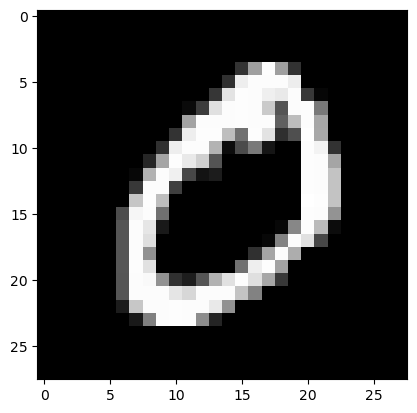

In [155]:
# pick a sample to plot
sample = 1
image = X_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

### Teacher Description

<section style="text-align:right;direction:rtl;">
    در گوگل کولب، اگر فقط X_train[1] را بنویسیم، بدون نیاز به plot، تصویر رسم خواهد شد.
</section>

In [159]:
X_train = X_train/255.0
X_test = X_test/255.0

### Teacher Description

<section style="text-align:right;direction:rtl;">
    میخوایم داده ها رو تو بازه 0 تا 1 قرار بدیم یا به اصطلاح نرمال کنیم.<br/>
    برای نرمال کردن دیتا های ورودی اونهارو تقسیم بر 255.0 میکنیم.<br/>
    <h4>چرا تقسیم بر 255 نکردیم؟</h4><br/>
    چون تقسیم بر اعشاری اگر حاصل عدد با رقم اعشاری شد اون روهم داشته باشیم و از دستش ندیم.<br/>
    در نرمالیزیشن میدانیم که مقادیر رو تقسیم بر max میکنیم.
</section>

In [163]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Teacher Description

<section style="text-align:right;direction:rtl;">
    حال اگر در خروجی سلول اسکرول کنیم پایین تر میبینیم این تقسیم در تمامی پیکسل های یک عکس رخ داده است.
</section>

In [167]:
pd.DataFrame(y_train)

,0
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [169]:
y_train[1]

0

### Teacher Description

In [181]:
# # one-hot

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### Teacher Description

<section style="text-align:right;direction:rtl;">
    مانند مثال دوم صفحه 83 جزوه، y هارو که لیبل A,B,C دادیم، اینجاهم باید مشخص کنیم که هر کدوم از خروجی ها نشانگر چه عددی هستن.<br/>
    میخوایم y_train از حالت عددی که نشون دهنده اینکه خروجی تصویر چه عددی هست رو به لیست با 10 ایندکس تبدیل کنیم (چون اعداد مون از 0 تا 9 بودن => 10 تا ایندکس داریم) که همه خونه ها 0 باشن بجز اون خونه ای ایندکسش برابر عدد تصویر است.
    <h4>one-hot</h4>
    همه ایندکس هارو به جز ایندکسی که نشانگر عدد مون هست رو 0 میکنه.<br/>
    ورودی اول نشون دهننده مطلب بالاست و ورودی دوم نشون دهنده اینکه لیست مون length چقدر باید باشه.
</section>

In [183]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Teacher Description

<section style="text-align:right;direction:rtl;">
    همانطور که میبینیم خروجی های ما لیست هایی با ایندکس 10 است. این لیست شامل عدد 0 و 1 است که هر ایندکس برابر 1 بود، نشان دهنده این است که تصویر خروجی عددی برابر ایندکس مذکور می باشد.<br/>
    به عنوان مثال خروجی اول نشانگر عدد 0 می باشد به عبارتی x_train[1] که شامل لیست بلندی بود که نرمال کردیم همان y_train[1] یا عدد 0 می باشد.
</section>

In [113]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

C:\Users\MA_Malekzadeh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Teacher Description

<section style="text-align:right;direction:rtl;">
    اولین لایه ای که میذاریم دیدیدم که Flatten هست چون باید تصویر رو به یک وکتور عمودی تبدیل کنیم.<br/>
    چون تصویرمون 28 در 28 است، باید در Flatten با کمک آرگومان input_shape بهش بدیم.<br/>
    لایه های Dense رو اضافه می کنیم و لایه های وسطی رو دیدیم که باید ReLU بذاریم (در جزوه هست).<br/>
    دیدیم که لایه های آخر در طبقه بندی چند کلاسه ، لایه خروجی شبکه عصبی تعداد نورون های برابر با تعداد کلاس ها می باشد.
</section>

In [115]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Teacher Description

<section style="text-align:right;direction:rtl;">
    ما دیگه الان بلدیم که 3 تا مرحله داریم برای آموزش مدل:<br>
    <ol>
    <li>ایجاد مدل</li>
    <li>کامپایل</li>
    <li>فبت</li>
    </ol>
    در اینجا otimizer آدام استفاده شده که بریم در مورد مطالعه کنیم<br/>
</section>

In [117]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8657 - loss: 0.4647 - val_accuracy: 0.9622 - val_loss: 0.1324
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9643 - loss: 0.1197 - val_accuracy: 0.9681 - val_loss: 0.1074
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9761 - loss: 0.0782 - val_accuracy: 0.9696 - val_loss: 0.1014
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9836 - loss: 0.0553 - val_accuracy: 0.9712 - val_loss: 0.1015
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9876 - loss: 0.0406 - val_accuracy: 0.9663 - val_loss: 0.1215
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9889 - loss: 0.0331 - val_accuracy: 0.9707 - val_loss: 0.1122
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9891 - loss: 0.0310 - val_accuracy: 0.9743 - val_loss: 0.1043
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9926 - loss: 0.0229 - 

<h4>سوالات دوستان</h4>

<section style="text-align:right;direction:rtl;">
    <h4>Validation_split چی کار میکنه؟</h4>
    یادتونه تو جلسات اول گفتیم که قسمتی از داده های train رو برمیداریم تا برای ارزیابی مدل هنگام آموزش دیدن استفاده کنیم؟ داده های train 80 درصد بود و داده های test 20 درصد. حالا از اون 80 درصد داده ایی که برای آموزش برداشتیم 20 یا 15 درصد برای validation و ادامش رو برای train بذاریم.
    <h4>25 در 25 چی بود تو بخش ایجاد مدل لایه اول زدیم؟</h4>
    سایز تصویرمون بود که جلوتر نمایش داده میشه.
    <h4>metrics در مرحله کامپایل رو بیشتر توضیح بدین</h4>
    متریکس همون ارزیاب شماست و ما که برابر با accuracy گذاشتیم میاد و این رو برای ما محاسبه میکنه و ما میتونیم دقت مدل مون رو بفهمیم.<br/>
    loss هم برعکس دقت است و نشون میده چقدر خطا داریم. در جلسات قبل که مربوط به رگرسیون بود دیدیم که میشه mse قرار بدیم که مقدار خطا رو بهمون نشون خواهد داد.برای کلاسه بندی بهتره از accuaracy استفاده کنیم که البته در جلسات بعد متریکس دیگری همه معرفی خواهد شد به اسم f1-score که دقیق تر برای کلاسیفیکیشن عمل میکنه.
    <h4>جمع accuracy و loss تو epoch های بالا برابر 1 نیست، مگه این ها مگه برعکس هم نیستن؟</h4>
    بله جمع آنها بیشتر از 1 شده بیشتر اوقات، منظورمون این است که از لحاظ مفهوم برعکس هم دیگه هستن.
    <h4>دفعه قبل validation رو با X_test , Y_test گرفتین</h4>
    همیشه سعی میکنم اینارو متفاوت براتون مقداردهی کنم که مدل های مختلف اجراهارو ببینید و اگه یه جایی خواستین استفاده کنین براتون آشنا باشه.
    <h4>همیشه شبکه های عصبی رو Dense باید در نظر بگیریم؟</h4>
    نه در Dense یک نوع لایه است و در آینده نزدیک با لایه های دیگه که برای پردازش تصویر خوب کار میکنن آشنا خواهید شد.
</section>

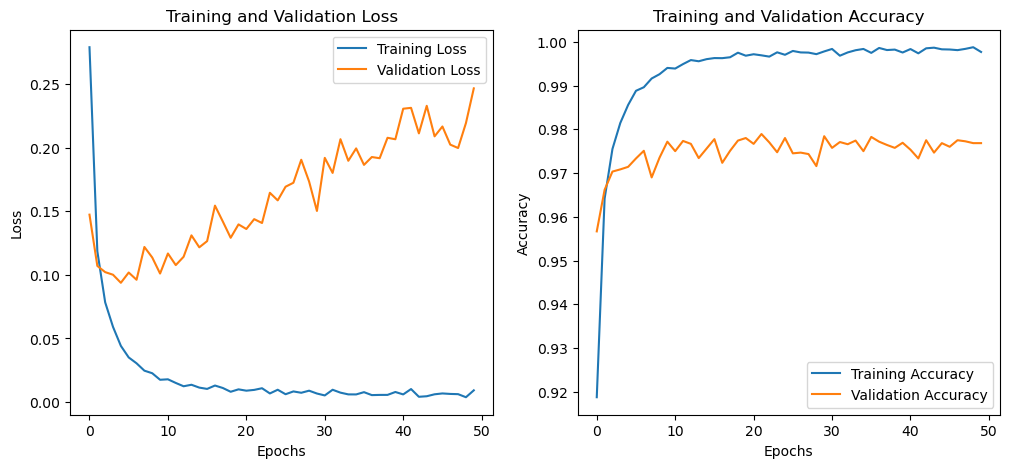

In [13]:
# رسم نمودارهای ضرر و دقت
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label2='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

### Teacher Description

<section style="text-align:right;direction:rtl;">
    <h4>نمودار سمت چپ - loss</h4>
     فاز training رو با نمودار آبی و فاز تست یا validation رو با نمودار نارنجی نشون داده شده.<br/>
    در هر epoch لاست رو برای ما نمایش میده.<br/>
    در فاز train با افزایش اپوک ها لاست کمتر و کمتر میشه ولی validation رفتار برعکسی رو نشون میده. بین این دو نمودار فاصله (gap) بزرگی هست.
    <h4>نمودار سمت راست - accuracy</h4>
    دقت هم رفتار مشابهی مثل loss داره بدین صورت که دقت در فاز آموزش بالاتر و بیشتر از فاز آزمایش است و دوباره گپ بزرگی بین این دو نمودار حاکم می باشد.
</section>